17464789/17464789 [==============================] - 0s 0us/step
<class 'list'>
1641221/1641221 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 70ms/step - loss: 0.5256 - binary_accuracy: 0.7779 - val_loss: 0.3980 - val_binary_accuracy: 0.8641
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3222 - binary_accuracy: 0.8949 - val_loss: 0.3285 - val_binary_accuracy: 0.8737
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2432 - binary_accuracy: 0.9163 - val_loss: 0.2835 - val_binary_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1945 - binary_accuracy: 0.9359 - val_loss: 0.2751 - val_binary_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1682 - binary_accuracy: 0.9437 - val_loss: 0.2955 - val_binary_accuracy: 0.8824
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1399 - 

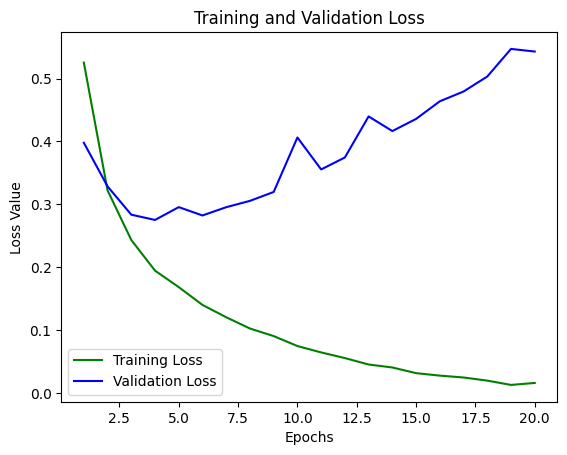

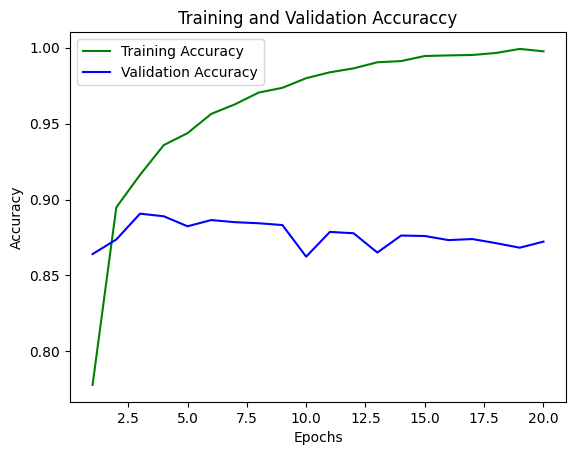

Epoch 1/3
30/30 [==============================] - 2s 60ms/step - loss: 0.0098 - binary_accuracy: 0.9994 - val_loss: 0.5658 - val_binary_accuracy: 0.8722
Epoch 2/3
30/30 [==============================] - 1s 34ms/step - loss: 0.0100 - binary_accuracy: 0.9990 - val_loss: 0.5849 - val_binary_accuracy: 0.8709
Epoch 3/3
782/782 [==============================] - 2s 2ms/step


<ipython-input-1-848a2d5937af>:127: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.round(score)


<tf.Tensor: shape=(), dtype=float32, numpy=0.1404>

In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

train_data[:2]

train_labels

# Check the first label
train_labels[0]

# Since we restricted ourselves to the top 10000 frequent words, no word index should exceed 10000
# we'll verify this below
# Here is a list of maximum indexes in every review --- we search the maximum index in this list of max indexes
print(type([max(sequence) for sequence in train_data]))
# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

# Let's quickly decode a review
# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()
# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Step 3: decode the review, mapping integer indices to words
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

len(reverse_word_index)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results
# Vectorize training Data
X_train = vectorize_sequences(train_data)
# Vectorize testing Data
X_test = vectorize_sequences(test_data)

X_train[0]

X_train.shape

y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss = losses.binary_crossentropy,
    metrics = [metrics.binary_accuracy]
)

# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)


history_dict = history.history
history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Training and Validation Accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.fit(
    partial_X_train,
    partial_y_train,
    epochs=3,
    batch_size=512,
    validation_data=(X_val, y_val)
)

# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)


result

y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = np.round(score)

mae = metrics.mean_absolute_error(y_pred, y_test)
mae


# New section